# 9 - Solving Coupled First-order Ordinary Differential Equations (ODEs)<br>*(Ch. 8.2)*

## Coupled first-order ODEs
Before moving on to solving the second-order differential equation 
\begin{equation*}\frac{d^2 x}{dt^2}=\frac{F_{net}}{m},\end{equation*}
let's take a slight detour to look at how we can solve coupled first-order ordinary differential equations. As an example, let's look at 
\begin{equation*}\frac{dx}{dt} = xy-x \quad , \quad \frac{dy}{dt} = y-xy+\mathrm{sin}^2\omega t.$$
These equations are obviously linked and cannot be solved separately from each other. Analytically, this could be a tricky problem to solve. 

<br><br><br><br><br><br><br><br><br><br><br><br>
Computationally, the method is not much more complicated than what we've already studied. The trick is to re-cast this problem in a vectorized form:
\begin{equation*}\frac{d{\bf{r}}}{dt} = {\bf{f}}({\bf{r}},t)\end{equation*}
where ${\bf{r}}$ is a vector and ${\bf{f}}$ is a 'vector' of functions ${\bf{f}}({\bf{r}},t) = (f_x({\bf{r}},t),f_y({\bf{r}},t),...)$, and
\begin{equation*} \frac{dx}{dt}=f_x(x,y,t)\quad , \quad \frac{dy}{dt}=f_y(x,y,t).\end{equation*}

With this understanding, the derivations for the Euler, RK2, and RK4 methods proceed in exactly the same way as they previously had been done. For instance, the fourth-order Runge-Kutta method looks like:
\begin{equation*} \begin{aligned} {\bf k}_1 & = h{\bf f}({\bf{r}},t) \\ 
{\bf k}_2 & = h{\bf f} \left( {\bf{r}} + \frac{1}{2} {\bf k}_1, t + \frac{1}{2} h \right) \\
{\bf k}_3 & = h{\bf f} \left( {\bf{r}} + \frac{1}{2} {\bf k}_2, t + \frac{1}{2} h \right) \\
{\bf k}_4 & = h{\bf f} \left( {\bf{r}} + {\bf k}_3, t + h \right) \\
{\bf{r}}(t+h) & = {\bf{r}}(t) + \frac{1}{6}\left( {\bf k}_1 + 2{\bf k}_2 + 2{\bf k}_3 + {\bf k}_4 \right) 
\end{aligned}\end{equation*} 






<br><br><br><br><br><br><br><br><br><br><br>
### Example

Consider the following coupled ODEs

\begin{equation*}\begin{aligned} \frac{\mathrm{d}x}{\mathrm{d}t} &= xy-x \\ 
\frac{\mathrm{d}y}{\mathrm{d}t} &= y-xy+\sin^2 \omega t \end{aligned}\end{equation*}

Plot these from $t=0$ to $t=10$ with $\omega = 1$ and $x=y=1$ at $t=0$.

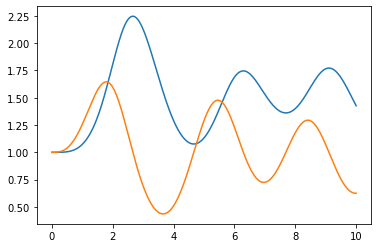

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0.0
tf = 10.0
w = 1.0
x0 = 1.0
y0 = 1.0
h = .001

def f(r,t):
    x,y = r[0],r[1]
    fx = x*y - x
    fy = y - x*y + (np.sin(w*t))**2
    return np.array([fx,fy],float)

tpoints = np.arange(t0,tf+h,h)
xpoints = []
ypoints = []

r = np.array([x0,y0],float)

for t in tpoints:
    xpoints.append(r[0]);
    ypoints.append(r[1]);
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(tpoints,xpoints)
plt.plot(tpoints,ypoints)

\begin{equation*} \begin{aligned} {\bf k}_1 & = h{\bf f}({\bf{r}},t) \\ 
{\bf k}_2 & = h{\bf f} \left( {\bf{r}} + \frac{1}{2} {\bf k}_1, t + \frac{1}{2} h \right) \\
{\bf k}_3 & = h{\bf f} \left( {\bf{r}} + \frac{1}{2} {\bf k}_2, t + \frac{1}{2} h \right) \\
{\bf k}_4 & = h{\bf f} \left( {\bf{r}} + {\bf k}_3, t + h \right) \\
{\bf{r}}(t+h) & = {\bf{r}}(t) + \frac{1}{6}\left( {\bf k}_1 + 2{\bf k}_2 + 2{\bf k}_3 + {\bf k}_4 \right) 
\end{aligned}\end{equation*}
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
#### Pre-generated solution:

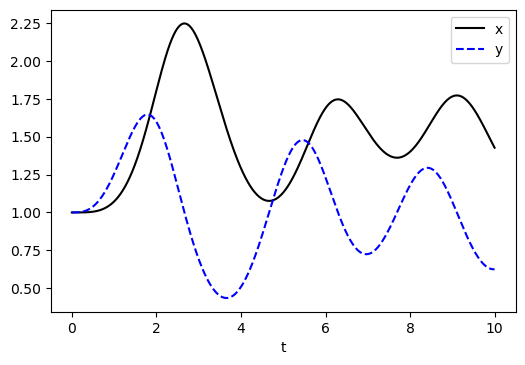

In [4]:
import matplotlib.pyplot as plt
import numpy as np

w = 1.0
x0 = 1.0
y0 = 1.0
t0 = 0.0
tf = 10.0

def f(r,t):
    # r is a 2D array, so first pull out the vals
    x,y = r[0],r[1]
    fx = x*y - x
    fy = y - x*y + np.sin(t)**2
    return np.array([fx,fy],float)

a = t0     
b = tf    
N = 10000
h = (b-a)/N 
 
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

# set up array with initial values x0,y0
r = np.array([x0,y0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    # Below we've just changed `x` into `r`
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.figure(dpi=100)            
plt.plot(tpoints,xpoints,'k-',label='x')  
plt.plot(tpoints,ypoints,'b--',label='y')
plt.xlabel('t')
plt.legend(loc='best')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Exercise: Humans vs Cybermen!
Let's play a game: Humans vs Cybermen! The students join one of two groups, designated as Humans and Cybermen, respectively. The Cybermen are a race of cybernetically-enhanced humans who have had all emotion removed and whose goal is to 'upgrade' all living things into Cybermen. Members of each group are armed with laser blasters. To make it interesting, let us assume that the firing rates, or "kill" rates, between the groups are different. Let $H$ be the number of Humans with a kill rate $\lambda_H$ and $C$ the number of Cybermen with a kill rate $\lambda_C$. In the simplest model, we can assume that the number of Humans decreases at a rate proportional to the kill rate and the number of Cybermen, and vice versa. This model can be written as
\begin{equation*}\frac{dH}{dt}=-\lambda_C C \quad , \quad \frac{dC}{dt}=-\lambda_H H.\end{equation*}
* a) Say you are the last one to join, and you are free to choose either group. The current situation is as follows: 69 Humans with a kill rate 2, and 99 cybermen with a kill rate 1. There are fewer Humans but they have twice the kill rate. If your goal is to win, guess which group would you join? Write down your answer!

* b) It is war now! Simulate the game by solving the model with the initial condition as: $\lambda_H = 2.0, \lambda_C=1.0$. If you decided to join the Humans, then $H=70, C=99$; otherwise $H=69, C=100$. Plot the $H-t$ and $C-t$ curves when the game ends.

* c) What happens if cybermen are allowed to ***upgrade*** humans to cybermen instead of killing the humans? If you start with 1000 humans, determine the minimum number of cybermen that would doom the human race! Assume \begin{equation*}\frac{dH}{dt}=(-\lambda_C - \beta_C) C \quad , \quad \frac{dC}{dt}=-\lambda_H H + \beta_C C\end{equation*} given an "upgrade rate" $\beta_C=1.0$ and a kill rate of $\lambda_C=1.0$ for the cybermen.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Exercise: Humans vs Cybermen!
Let's play a game: Humans vs Cybermen! The students join one of two groups, designated as Humans and Cybermen, respectively. The Cybermen are a race of cybernetically-enhanced humans who have had all emotion removed and whose goal is to 'upgrade' all living things into Cybermen. Members of each group are armed with laser blasters. To make it interesting, let us assume that the firing rates, or "kill" rates, between the groups are different. Let $H$ be the number of Humans with a kill rate $\lambda_H$ and $C$ the number of Cybermen with a kill rate $\lambda_C$. In the simplest model, we can assume that the number of Humans decreases at a rate proportional to the kill rate and the number of Cybermen, and vice versa. This model can be written as
\begin{equation*}\frac{dH}{dt}=-\lambda_C C \quad , \quad \frac{dC}{dt}=-\lambda_H H.\end{equation*}
* a) Say you are the last one to join, and you are free to choose either group. The current situation is as follows: 707 Humans with a kill rate 2, and 1000 cybermen with a kill rate 1. There are fewer Humans but they have twice the kill rate. If your goal is to win, guess which group would you join? Write down your answer!

* b) It is war now! Simulate the game by solving the model with the initial condition as: $\lambda_H = 2.0, \lambda_C=1.0$. If you decided to join the Humans, then $H=708, C=1000$; otherwise $H=707, C=1001$. Plot the $H-t$ and $C-t$ curves when the game ends.

* c) What happens if cybermen are allowed to ***upgrade*** humans to cybermen instead of killing the humans? If you start with 1000 humans, determine the minimum number of cybermen that would doom the human race! Assume \begin{equation*}\frac{dH}{dt}=(-\lambda_C - \beta_C) C \quad , \quad \frac{dC}{dt}=-\lambda_H H + \beta_C C\end{equation*} given an "upgrade rate" $\beta_C=1.0$ and a kill rate of $\lambda_C=1.0$ for the cybermen.

<br><br><br><br><br><br><br><br><br><br><br>
(Pre-generated solution)

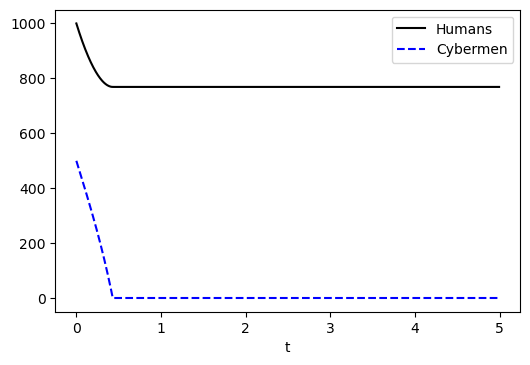

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

lambdaH = 2.0
lambdaC = 0.0
betaC = 2.0
H0 = 1000
C0 = 500

def f(r,t):
    # r is a 2D array, so first pull out the vals
    H,C = r[0],r[1]
    fH = (-lambdaC-betaC)*C
    fC = -lambdaH*H + betaC*C
    return np.array([fH,fC],float)

t0 = 0.0     
tf = 5.0    
N = 1000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)
Hpoints = []
Cpoints = []

# set up array with initial values x0,y0
r = np.array([H0,C0],float)

for t in tpoints:
    Hpoints.append(r[0])
    Cpoints.append(r[1])
    # Below we've just changed `x` into `r`
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    if r[0] <= 0 or r[1]<=0: #End the game when one team wins
        r[0] = Hpoints[-1]
        r[1] = Cpoints[-1]
    
plt.figure(dpi=100)            
plt.plot(tpoints,Hpoints,'k-',label='Humans')  
plt.plot(tpoints,Cpoints,'b--',label='Cybermen')
plt.xlabel('t')
plt.legend(loc='best')
#plt.ylim(0,3)
plt.show()